## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score # evaluate model after training

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
ds1 = "/Users/evelinesetiawan/Downloads/MQ BA materials/COMP6200_Data Science/portfolio-part-2-evelineps178/Portfolio 2 - resources/cleaned_ecommerce_dataset.csv"
df = pd.read_csv(ds1)

In [3]:
len(df)

2685

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

#### 1) Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [5]:
df.dtypes

userId           int64
timestamp        int64
review          object
item            object
rating         float64
helpfulness    float64
gender          object
category        object
item_id          int64
item_price     float64
user_city        int64
dtype: object

#### 2) As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

*Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful examples [here](https://pbpython.com/categorical-encoding.html))*

*using label encoding*

In [6]:
# gather all variable that under "object" category
from sklearn.preprocessing import OrdinalEncoder
obj_cat_df = df.select_dtypes(include=['object']).copy()
obj_cat_df.head()

,review,item,gender,category
0,Not always McCrap,McDonald's,M,Restaurants & Gourmet
1,I dropped the chalupa even before he told me to,Taco Bell,M,Restaurants & Gourmet
2,The Wonderful World of Wendy,Wendy's,M,Restaurants & Gourmet
3,They actually did it,"South Park: Bigger, Longer & Uncut",M,Movies
4,Hey! Gimme some pie!,American Pie,M,Movies


In [7]:
# changing the variable into a categorical features
df["gender"] = df["gender"].astype("category")
df.dtypes
df["gender"] = df["gender"].cat.codes
df.head()

df["category"] = df["category"].astype("category")
df.dtypes
df["category"] = df["category"].cat.codes
df.head()

df["review"] = df["review"].astype("category")
df.dtypes
df["review"] = df["review"].cat.codes
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,1618,McDonald's,4.0,3.0,1,8,41,30.74,4
1,4081,72000,1125,Taco Bell,1.0,4.0,1,8,74,108.30,4
2,4081,72000,2185,Wendy's,5.0,4.0,1,8,84,69.00,4
3,4081,100399,2243,"South Park: Bigger, Longer & Uncut",5.0,3.0,1,5,68,143.11,4
4,4081,100399,1033,American Pie,3.0,3.0,1,5,6,117.89,4


In [8]:
# helpfulness/gender/category/review and rating
df[["helpfulness","rating", "gender","category", "review"]].corr()

,helpfulness,rating,gender,category,review
helpfulness,1.000000,-0.007523,0.075947,-0.013408,-0.028259
rating,-0.007523,1.000000,-0.034337,-0.163158,-0.036118
gender,0.075947,-0.034337,1.000000,0.022549,-0.037884
category,-0.013408,-0.163158,0.022549,1.000000,0.001970
review,-0.028259,-0.036118,-0.037884,0.001970,1.000000


Among these 4 variables namely helpfulness, gender, category and review that were observed compared to rating, category is the most correlated variable with the amount of -0,163158 and it follows with review, gender and helpfulness.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [9]:
# Case 1: training data containing 10% of the entire data
train_case_1, test_case_1 = train_test_split(df, test_size=0.9, random_state=142)
print(train_case_1.shape)
print(test_case_1.shape)

# Case 2: training data containing 90% of the entire data
train_case_2, test_case_2 = train_test_split(df, test_size=0.1, random_state=142)
print(train_case_2.shape)
print(test_case_2.shape)

(268, 11)
(2417, 11)
(2416, 11)
(269, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from **helpfulness/gender/category/review regarding rating**, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [10]:
# (model-a) using the training/testing data in case 1 with two most correlated input features ; category & review
X_train_1a = train_case_1[['category', 'review']]
y_train_1a = train_case_1[['rating']]

X_test_1a = test_case_1[['category', 'review']]
y_test_1a = test_case_1[['rating']]

reg_model_a = linear_model.LinearRegression()
reg_model_a.fit(X_train_1a, y_train_1a)

# (model-b) using the training/testing data in case 1 with two least correlated input features ; gender & helpfulness
X_train_1b = train_case_1[['gender', 'helpfulness']]
y_train_1b = train_case_1[['rating']]

X_test_1b = test_case_1[['gender', 'helpfulness']]
y_test_1b = test_case_1[['rating']]

reg_model_b = linear_model.LinearRegression()
reg_model_b.fit(X_train_1b, y_train_1b)

# (model-c) using the training/testing data in case 2 with two most correlated input features
X_train_2c = train_case_2[['category', 'review']]
y_train_2c = train_case_2[['rating']]

X_test_2c = test_case_2[['category', 'review']]
y_test_2c = test_case_2[['rating']]

reg_model_c = linear_model.LinearRegression()
reg_model_c.fit(X_train_2c, y_train_2c)

# (model-d) using the training/testing data in case 2 with two least correlated input features
X_train_2d = train_case_2[['gender', 'helpfulness']]
y_train_2d = train_case_2[['rating']]

X_test_2d = test_case_2[['gender', 'helpfulness']]
y_test_2d = test_case_2[['rating']]

reg_model_d = linear_model.LinearRegression()
reg_model_d.fit(X_train_2d, y_train_2d)

LinearRegression()

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including **MSE** and **Root MSE**
* Print the results of the four models regarding the two metrics

In [11]:
# model A
predicted_model_a = reg_model_a.predict(X_test_1a)
mse_model_a = ((np.array(y_test_1a)-predicted_model_a)**2).sum()/len(y_test_1a)
r2_model_a = r2_score(y_test_1a, predicted_model_a)
rmse_model_a = np.sqrt(mse_model_a)
print("MSE model A:", mse_model_a)
print("Root MSE model A:", rmse_model_a)
print("R Squared model A:", r2_model_a)

MSE model A: 1.7690740179517055
Root MSE model A: 1.3300654186737229
R Squared model A: 0.020578145218415278


In [12]:
# model B
predicted_model_b = reg_model_b.predict(X_test_1b)
mse_model_b = ((np.array(y_test_1b)-predicted_model_b)**2).sum()/len(y_test_1b)
r2_model_b = r2_score(y_test_1b, predicted_model_b)
rmse_model_b = np.sqrt(mse_model_b)
print("MSE model B:", mse_model_b)
print("Root MSE model B:", rmse_model_b)
print("R Squared model B:", r2_model_b)

MSE model B: 1.8412549895856636
Root MSE model B: 1.356928513071217
R Squared model B: -0.019383789895821568


In [13]:
# model C
predicted_model_c = reg_model_c.predict(X_test_2c)
mse_model_c = ((np.array(y_test_2c)-predicted_model_c)**2).sum()/len(y_test_2c)
r2_model_c = r2_score(y_test_2c, predicted_model_c)
rmse_model_c = np.sqrt(mse_model_c)
print("MSE model C:", mse_model_c)
print("Root MSE model C:", rmse_model_c)
print("R Squared model C:", r2_model_c)

MSE model C: 1.758897535980505
Root MSE model C: 1.3262343442923294
R Squared model C: 0.022040319944943154


In [14]:
# model D
predicted_model_d = reg_model_d.predict(X_test_2d)
mse_model_d = ((np.array(y_test_2d)-predicted_model_d)**2).sum()/len(y_test_2d)
r2_model_d = r2_score(y_test_2d, predicted_model_d)
rmse_model_d = np.sqrt(mse_model_d)
print("MSE model D:", mse_model_d)
print("Root MSE model D:", rmse_model_d)
print("R Squared model D:", r2_model_d)

MSE model D: 1.8109460127732366
Root MSE model D: 1.3457139416581954
R Squared model D: -0.006899007486201203


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

Below, we have 4 models of data training as explain here :
1. model A (two **most** correlated input features)
    - (category and review) vs rating 
    - **90%** training data
2. model B (two **least** correlated input features)
    - (gender and helpfulness) vs rating 
    - **90%** training data
3. model C (two **most** correlated input features)
    - (category and review) vs rating 
    - **10%** training data
4. model D (two **least** correlated input features)
    - (gender and helpfulness) vs rating 
    - **10%** training data
    
When we test the model A and model C, we got the value of MSE around 1,769 and 1,762 each and the RMSE show the similar value of 1,330 and 1,327. This means between these 2 model, model C prediction's are closer to the real value.

As for model B and model D, the value of MSE are 1,830 and 1,810 respectively. While RMSE, it reach around 1,3524 and 1,3452. This figures display that model D has smaller value than model B, which again reflect better overall performance. 

To summarize, this training obtain the similar observation, by using the most correlated input variables into training data will produce the better results.

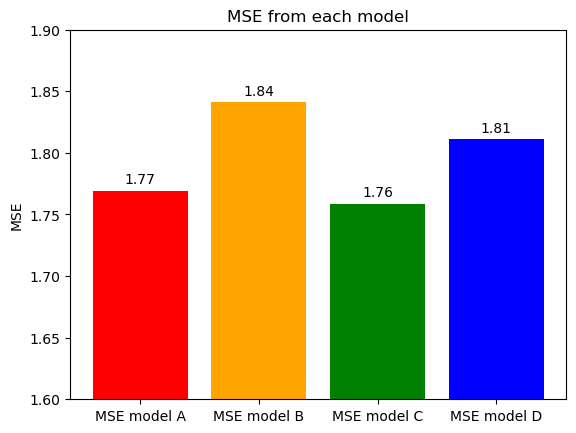

In [18]:
import matplotlib.pyplot as plot
fig, ax = plot.subplots()

axis = ['MSE model A', 'MSE model B', 'MSE model C', 'MSE model D']
axis_value = [mse_model_a, mse_model_b, mse_model_c, mse_model_d]
bar_label = ['red', 'orange', 'green', 'blue']

bars = ax.bar(axis, axis_value, color=bar_label)
ax.set_ylabel('MSE')
ax.set_title('MSE from each model')
plt.ylim(1.6,1.9)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plot.show()

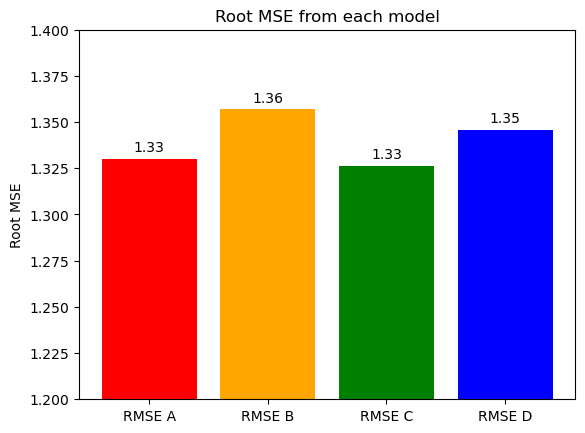

In [16]:
import matplotlib.pyplot as plot
fig, ax = plot.subplots()
axis_2 = ['RMSE A', 'RMSE B', 'RMSE C', 'RMSE D']
axis_value_2 = [rmse_model_a, rmse_model_b, rmse_model_c, rmse_model_d]
bar_label_2 = ['red', 'orange', 'green', 'blue']

bars = ax.bar(axis_2, axis_value_2, color=bar_label_2)
ax.set_ylabel('Root MSE')
ax.set_title('Root MSE from each model')
plt.ylim(1.20, 1.40)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
plot.show()

### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.




#### Ethical potential concerns analysis
   These 2 tables elaborates how many medals of 5 countries get in 2008 Summer Olympic. The first table is classified by the total medals each country gets and the second table is sorted by gold medals. However the tables both didn't visualized clearly and in my opinion, these may lead to ethical issue of data science. 

   Visualization is one of key point to show the data, so it will be easier for the reader to read and interpret the result to be fair and objective. Nonetheless, these 2 tables didn’t represent the data well. They didn’t use the benchmark or the assessment standard for both table which can cause misunderstanding between the reader. Furthermore, with the external factors for example the tensions or issues between some countries, the tables will worsen the situation with the country placement. 

   Speaking of clarity and simplicity, the tables are indeed represented well, however it is better not to display 2 tables with same compositions which categorized with distinct based. This might lead to a confusion to decide who occupied the first position. It’s better to make another visualization such as pie graph or bar chart.
    
*191 words*